# Matplotlib

## Exercise 1: Birth Rates

The data on US births, provided by the CDC is in `data/births.csv`.

Reproduce the following plot of births by gender over time given the data:

![](../assets/births_gender.png)

Note the `1e6` on the y axis for scale

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

births = pd.read_csv("C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/ds-data-visualization-P1-main/ds-data-visualization-P1-main/data/births.csv")
df = births.copy()

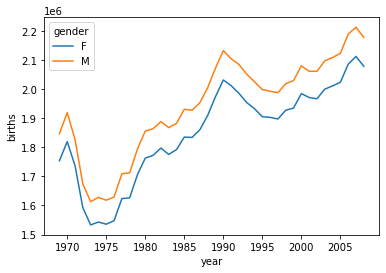

In [2]:
# exercise 1
grp = df.groupby(['year','gender'])
ydf=grp.sum()
sns.lineplot(x='year',y='births',hue='gender',data=ydf)
plt.show()

## Exercise 2

Reproduce the plot below:

![ex2](../assets/federer.png)

Given the `../data/tennis.csv` file.

Note that the y axis is the ration of `double faults` that Federer did over his `total points total` in a match.

In [12]:
tennis = pd.read_csv("C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/ds-data-visualization-P1-main/ds-data-visualization-P1-main/data/tennis.csv")
df = tennis.copy()

C:\Users\Simona\AppData\Local\Temp\ipykernel_808\659138579.py:9: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set(xticks=[])


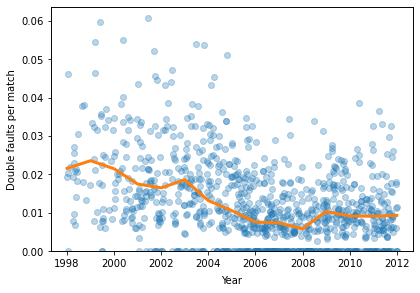

In [4]:
# exercise 2

df['double faults']=df['player1 double faults']/df['player1 total points total']

fig, ax = plt.subplots(figsize=(6.5,4.5))
x=df['start date']
y=df['double faults']
ax.scatter(x='start date',y='double faults',data=df,alpha=0.3)
ax.set(xticks=[])
plt.ylim(ymin=0.0)

ax.set_xlabel('Year')
ax.set_ylabel('Double faults per match')
ax.xaxis.set_label_coords(.5,-.1)


x=df['year']
ax2 = ax.twiny()
sns.lineplot(x=x,y=y,data=df,color='tab:orange',linewidth=3,alpha=1,err_style=None)
ax2.xaxis.set_ticks_position('bottom')
ax2.set_xlabel('')

plt.ylim(ymin=0.0)
plt.show()

## Exercise 3: Multi Plot

Recall exercise 2's plot.

Make the same plot tracking double faults over time, except make one such plot for each surface type (indoor hard, outdoor clay, etc.)

Have all 6 plots (one per surface type) be in the same matplotlib figure together, similar to the plot we saw in part 4 of the lecture.

C:\Users\Simona\AppData\Local\Temp\ipykernel_808\3143192678.py:15: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  axes[i,j].set(xticks=[])
C:\Users\Simona\AppData\Local\Temp\ipykernel_808\3143192678.py:15: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  axes[i,j].set(xticks=[])
C:\Users\Simona\AppData\Local\Temp\ipykernel_808\3143192678.py:15: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  axes[i,j].set(xticks=[])
C:\Users\Simona\AppData\Local\Temp\ipykernel_808\3143192678.py:15: MatplotlibDeprecationWarning: Support for passing numbers through unit conv

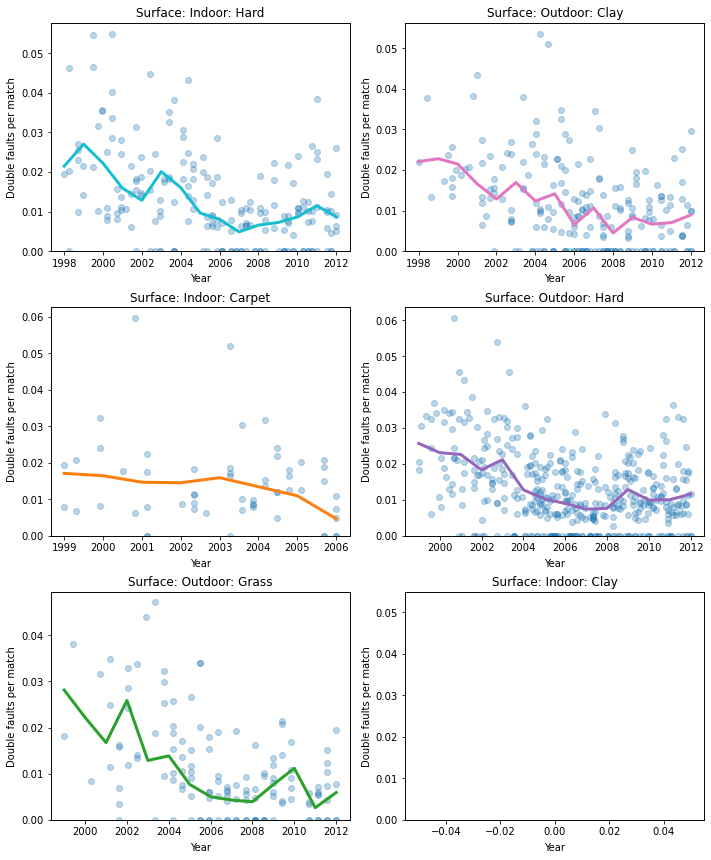

In [5]:
# exercise 3
df=tennis.copy()
df['double faults']=df['player1 double faults']/df['player1 total points total']
surface=0
palette=['tab:cyan','tab:pink','tab:orange','tab:purple','tab:green','tab:gray']
    
num_rows, num_cols = 3,2
fig, axes = plt.subplots(num_rows,num_cols,figsize=(10,12))
for i in range(num_rows):
    for j in range(num_cols):
        dfi=df[df.surface==(df['surface'].unique()[surface])]
        x=dfi['start date']
        y=dfi['double faults']
        axes[i,j].scatter(x='start date',y='double faults',data=dfi,alpha=0.3)
        axes[i,j].set(xticks=[])

        axes[i,j].set_xlabel('Year')
        axes[i,j].set_ylabel('Double faults per match')
        axes[i,j].set_title(f"Surface: {str(df['surface'].unique()[surface])}")
        axes[i,j].xaxis.set_label_coords(.5,-.1)
        axes[i,j].tick_params(labelbottom=False,bottom=False)

        x=dfi['year']
        axes2 = axes[i,j].twiny()
        sns.lineplot(x=x,y=y,data=dfi,color=palette[surface],linewidth=3,alpha=1,err_style=None)
        axes2.xaxis.set_ticks_position('bottom')
        axes2.set_xlabel('')

        plt.ylim(ymin=0.0)
        surface+=1
        
plt.tight_layout()
plt.show()

## Exercise 4: Births anomalies

This was analyzed by beloved statistician Andrew Gelman [here](http://andrewgelman.com/2012/06/14/cool-ass-signal-processing-using-gaussian-processes/), leading to this plot:

<img src="../assets/births_gp100.png" style="max-width: 600px;" />

**4.1**  Attempt to BRIEFLY explain the three plots in Gelman's figure. 

In [6]:
# exercise 4.1 (explain here)

# The first plot graphs the relative number of births on the y axis. The x axis represents the day of the year 
# (ex: 1/1 is the first of January). The births line represents a line plot graphing the births by day of the year. The plot 
# includes a smoothed line which averages out the number of births over a certain number of births. The graph also 
# inclues a mean, a constant of 100.

# The second plot shows the periodic component of the line plot for births in first graph, meaning that it shows the change in 
# values from one value of y to the next, and shows either an increase or a decrease in value on the y axis of this plot. The x
# axis is still the day of the year.

# The third plot shows the residual, meaning the difference between the values for births in the first plot compared to the
# smoothed line on the y axis of this plot. The x axis is still the day of the year.

**4.2** What is the periodic component? What is the residual? Use your research skills to learn then explain it (in english).

In [7]:
# exercise 4.2 (explain here)

# A periodic component shows a change in value from the previous value, standardized with the rest of the values.

# The residual measures the difference between the value from the real data and the predicted value.